# MarketPlace Property values check

This is document cheks the marketPlace using the python library Pandas.

*One question about the API: is there a call I could use to see all the
"values" that are behind a given dynamic property? Example: all the
terms/words that are used to populate "activity" or "material" for all
the items in the MP (or by class). I know that for "activity" we are
supposed to have only terms coming from TADIRAH and Nemo, but this is
exactly what I would like to check.*



# Preamble

In [4]:
import ast
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

# for db
import sqlalchemy as db
from sqlalchemy import *

## Get the the Market Place properties (using the API)

The SSHOC Market Place API entry: 

https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/property-types

has been used to extract the to get the list of dynamic properties in the SSHOC Market Place. 

In [492]:
x = ('1','2')
df_dynammic_properties = pd.DataFrame()
for var in x:
    url = "https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/property-types?page="+str(var)+"&perpage=20"
    df_tool_par=pd.read_json(url, orient='columns')
    df_dynammic_properties=df_dynammic_properties.append(df_tool_par, ignore_index=True)
    #print("url: "+ url + ":",var)
#df_dynammic_properties.head()

There are 28  property types in MP dataset. The following table shows 10 records.

In [493]:
#properties are returned as JSON object, create a dataframe
pd.reset_option('max_colwidth')
df_dypro_flat = pd.json_normalize(df_dynammic_properties['propertyTypes'])
df_dypro_flat.sort_values('label').head(10)

,code,label,type,ord,allowedVocabularies
1,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO..."
29,authentication,Authentication,string,30,[]
18,conference,Conference,string,19,[]
14,cover-image,Cover Image,url,15,[]
25,doi,DOI,string,26,[]
20,issue,Issue,string,21,[]
17,journal,Journal,string,18,[]
5,keyword,Keyword,string,6,[]
0,language,Language,concept,1,"[{'code': 'iso-639-3', 'label': 'ISO 639-3', '..."
9,license-type,License Type,string,10,[]


#### Property Types with vocabularies

In [8]:
df_prop_data = pd.json_normalize(data = df_dynammic_properties['propertyTypes'], record_path='allowedVocabularies', meta_prefix='activity_', meta=['label'])
df_prop_data.head(10)

,code,label,accessibleAt,activity_label
0,iso-639-3,ISO 639-3,None,Language
1,iso-639-3-v2,ISO 639-3 Sprachcodes,None,Language
2,nemo-activity-type,NeMO Concept Scheme,None,Activity
3,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activit...,None,Activity
4,tadirah-research-technique,TaDiRAH Research Technique,None,Technique
5,iana-mime-type,IANA mime/type,None,Object format
6,publication-type,The Bibliographic Ontology Concept Scheme,None,Publication type


#### Chek values for TaDIRAH activity

In [9]:
y = pd.Series(range(1,20))
df_dynammic_properties_values= pd.DataFrame()
for var in y:
    url1= 'https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/vocabularies/tadirah-activity?page='+str(var)+'&perpage=20'
    df_terms_par=pd.read_json(url1, orient='columns')
    df_dynammic_properties_values=df_dynammic_properties_values.append(df_terms_par, ignore_index=True)
    #print("url: "+ url + ":",var)
df_dynammic_properties_values.head()

,code,label,accessibleAt,description,conceptResults
0,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activit...,NaN,,"[{'code': '10', 'vocabulary': {'code': 'tadira..."
1,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activit...,NaN,,20
2,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activit...,NaN,,169
3,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activit...,NaN,,1
4,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activit...,NaN,,9


In [421]:
#df = df[df.line_race == NaN]
my_values=df_dynammic_properties_values.loc[df_dynammic_properties_values.conceptResults.apply(lambda x: not isinstance(x, (float, int)))]
#my_values.head(10)

In [494]:
actual_values = my_values.iloc[:9]

In [497]:
test_df=actual_values['conceptResults'].apply(pd.Series)
#test_df.head(2)

In [323]:
pd.reset_option('max_colwidth', 250)
df_dypro_flat_values_joined= pd.DataFrame()
nva=0;
while nva <20:
    mycol=test_df[nva];
    mycol = mycol.dropna()
    temp_dypro_flat_values = pd.json_normalize(mycol)
    df_dypro_flat_values_joined=pd.concat([df_dypro_flat_values_joined, temp_dypro_flat_values])
    nva= nva+1
df_dypro_flat_values_joined.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True) 
df_dypro_flat_values_joined.sort_values("label").head(2)

,code,label,notation,definition,uri,relatedConcepts,vocabulary.code,vocabulary.label,vocabulary.accessibleAt
3,Meta-Activities,0_Meta-Activities,Meta-Activities,"Meta-Activities are activities which, unlike r...",https://sshoc.poolparty.biz/Vocabularies/tadir...,"[{'code': 'Meta:_Assessing', 'vocabulary': {'c...",tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activit...,None
0,Capture,1_Capture,Capture,Capture generally refers to the activity of cr...,https://sshoc.poolparty.biz/Vocabularies/tadir...,"[{'code': 'Conversion', 'vocabulary': {'code':...",tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activit...,None


In [14]:
df_dypro_flat_values_joined[['code', 'label', 'notation', 'definition', 'uri', 'vocabulary.label', 'vocabulary.accessibleAt']].sort_values('label').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/tadirahvalues.csv')

In [518]:
#df_prop_data_values related = pd.json_normalize(data = df_dypro_flat_values_joined['relatedConcepts'], record_path='allowedVocabularies', meta_prefix='activity_', meta=['label'])
#df_prop_data.head(10)
pd.set_option('max_colwidth', 100)
test_df1=df_dypro_flat_values_joined.sort_values("label")['relatedConcepts'].apply(pd.Series)
# Dropping the unserialized column
df_dypro_flat_values_joined_1 = df_dypro_flat_values_joined.drop(["relatedConcepts"], axis=1)

myTest=df_dypro_flat_values_joined_1.join(test_df1, lsuffix='_left')
myTest.head(2)

,code,label,notation,definition,uri,vocabulary.code,vocabulary.label,vocabulary.accessibleAt,0,1,...,26,27,28,29,30,31,32,33,34,35
0,10,Discovering,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/10,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,None,"{'code': 'Conversion', 'vocabulary': {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy o...","{'code': 'Data_Recognition', 'vocabulary': {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10,Discovering,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/10,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,None,"{'code': 'Content_Analysis', 'vocabulary': {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxo...","{'code': 'Network_Analysis', 'vocabulary': {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [479]:
act_df=myTest[['label', 'uri',  0, 1]].sort_values('label')
act_df = act_df.rename(columns={0: 'fv'})
#act_df.head()

In [454]:
act_df_1=act_df['fv'].apply(pd.Series)
act_df_1=act_df_1.drop(["definition"], axis=1)
#act_df=act_df.drop(["fv"], axis=1)
#act_df_1=act_df_1.drop(['vocabulary'], axis=1)
act_df_1.head(5)

,code,vocabulary,label,notation,uri,relation
3,Meta:_Assessing,"{'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', 'accessibleAt': None}",Meta: Assessing,Meta: Assessing,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta:_Assessing,"{'code': 'narrower', 'label': 'Narrower'}"
3,15,"{'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', 'accessibleAt': None}",Creation,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/15,"{'code': 'broader', 'label': 'Broader'}"
3,15,"{'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', 'accessibleAt': None}",Creation,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/15,"{'code': 'broader', 'label': 'Broader'}"
3,92,"{'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', 'accessibleAt': None}",Research Techniques,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/92,"{'code': 'broader', 'label': 'Broader'}"
3,15,"{'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', 'accessibleAt': None}",Creation,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/15,"{'code': 'broader', 'label': 'Broader'}"


In [483]:
#pippo= act_df.sort_values('label')
#pippo.head()

In [519]:
pd.set_option('max_colwidth', 100)
myTest_act_df=pippo.join(act_df_1, lsuffix='_rel')
myTest_act_df=myTest_act_df.drop(["fv"], axis=1)
myTest_act_df=myTest_act_df.drop([1], axis=1)
myTest_act_df=myTest_act_df.drop(["vocabulary"], axis=1)
myTest_act_df=myTest_act_df.drop(["relation"], axis=1)
#myTest_act_df=myTest_act_df.drop(["notation"], axis=1)
printfile=myTest_act_df.sort_values('label_rel')
printfile.drop_duplicates().head(10)

,label_rel,uri_rel,code,label,notation,uri
3,0_Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities,15,Creation,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/15
3,0_Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities,7,Capture,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/7
3,0_Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities,Contextualizing,Contextualizing,Contextualizing,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Contextualizing
3,0_Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities,Enrichment,3_Enrichment,Enrichment,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Enrichment
3,0_Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities,6,Research Activities,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/6
3,0_Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities,55,Research Objects,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/55
3,0_Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities,Meta:_Assessing,Meta: Assessing,Meta: Assessing,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta:_Assessing
3,0_Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities,Meta-Activities,0_Meta-Activities,Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities
3,0_Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities,Interpretation,5_Interpretation,Interpretation,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Interpretation
3,0_Meta-Activities,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/Meta-Activities,92,Research Techniques,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/92


In [517]:
pd.reset_option('max_colwidth', 650)
printfile.drop_duplicates().iloc[2]

label_rel                                    0_Meta-Activities
uri_rel      https://sshoc.poolparty.biz/Vocabularies/tadir...
code                                           Contextualizing
label                                          Contextualizing
notation                                       Contextualizing
uri          https://sshoc.poolparty.biz/Vocabularies/tadir...
Name: 3, dtype: object

In [491]:
printfile.drop_duplicates().to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/tadirahvaluesrel.csv')

## Parse the services and tools descriptions in the Market Place (using the API)
The SSHOC Market Place API entry:
https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/tools-services
has been used to extract the  descriptions of tools and services stored the SSHOC Market Place. In the rest of the document this dataset will be called: MP dataset


In [17]:
x = pd.Series(range(2,69))
url = 'https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/tools-services?page=1&perpage=20'
df_tool_all = pd.read_json(url, orient='columns')
for var in x:
    url = "https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/tools-services?page="+str(var)+"&perpage=20"
    df_tool_par=pd.read_json(url, orient='columns')
    df_tool_all=df_tool_all.append(df_tool_par, ignore_index=True)
   # print("url: "+ url + ":",var)
df_tool_all.index

RangeIndex(start=0, stop=1360, step=1)

##### See the column names and have a look at a generic  item

In [257]:
df_tool_all.iloc[10]

hits                                                                                                                                                                                                          1369
count                                                                                                                                                                                                           20
page                                                                                                                                                                                                             1
perpage                                                                                                                                                                                                         20
pages                                                                                                                                                       

In [273]:
df_tool_flat = pd.json_normalize(df_tool_all['tools'])
df_tool_flat.iloc[178]

id                                                                       446
category                                                     tool-or-service
label                                                            Coffitivity
version                                                                 None
description                Coffitivity recreates the ambient sounds of a ...
licenses                                                                  []
contributors               [{'actor': {'id': 493, 'name': '18th Connect',...
properties                 [{'id': 3991, 'type': {'code': 'web-usable', '...
accessibleAt                                                              []
sourceItemId                                                             801
relatedItems                                                              []
informationContributors    [{'id': 4, 'username': 'System importer', 'dis...
lastInfoUpdate                                      2020-06-28T18:24:22+0000

In [278]:
df_tool_flat.head(2)

,id,category,label,version,description,licenses,contributors,properties,accessibleAt,sourceItemId,...,lastInfoUpdate,status,comments,olderVersions,newerVersions,source.id,source.label,source.url,source.urlTemplate,source
0,641,tool-or-service,140kit,None,140kit provides a management layer for tweet c...,[],"[{'actor': {'id': 483, 'name': 'Ian Pearce, De...","[{'id': 96464, 'type': {'code': 'web-usable', ...",[https://github.com/WebEcologyProject/140kit],937,...,2020-09-02T09:31:27+0000,ingested,[],[],[],1.0,TAPoR,http://tapor.ca,http://tapor.ca/tools/{source-item-id},NaN
1,249,tool-or-service,3DVIA Virtools,None,A software tool for the creation of 3D interac...,[],"[{'actor': {'id': 213, 'name': 'Dassault Syste...","[{'id': 92493, 'type': {'code': 'web-usable', ...",[],1229,...,2020-09-02T09:30:55+0000,ingested,[],[],[],1.0,TAPoR,http://tapor.ca,http://tapor.ca/tools/{source-item-id},NaN


#### We're interested in the column properties

In [200]:
#we're interested in the column properties, let'see this column values
pd.set_option('max_colwidth', 200)
df_prop_data = pd.json_normalize(data=df_tool_all['tools'], record_path='properties', meta=['label'])
df_prop_data.head(10)

,id,value,concept,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,label
0,96464,Run in Browser,NaN,web-usable,Web Usable,string,11,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
1,96465,Visualization,NaN,keyword,Keyword,string,6,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
2,96466,Analysis,NaN,keyword,Keyword,string,6,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
3,96467,Analysis,NaN,tadirah-goals,Tadirah Goals,string,7,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
4,96468,Visualization,NaN,tadirah-methods,Tadirah Methods,string,13,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
5,96469,None,NaN,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', ...",32,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,NaN,Visualization,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/32,140kit
6,96470,None,NaN,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', ...",25,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,NaN,Analysis,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,140kit
7,96471,Capture,NaN,keyword,Keyword,string,6,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
8,96472,Gathering,NaN,keyword,Keyword,string,6,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
9,96473,None,NaN,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', ...",11,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,NaN,Gathering,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/11,140kit


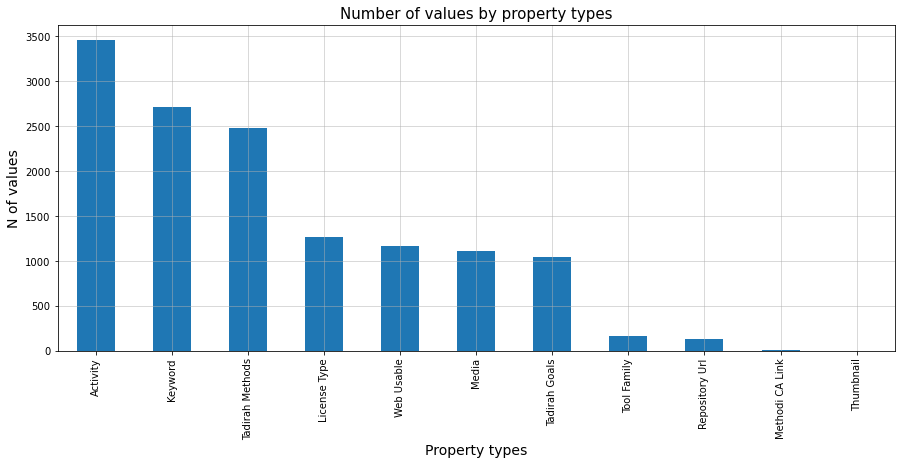

In [57]:
df_temp_type_label = df_prop_data['type.label'].value_counts()
fig, ax = plt.subplots()
df_temp_type_label.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of values by property types", fontsize=15)
ax.set_xlabel('Property types', fontsize=14)
ax.set_ylabel('N of values', fontsize=14);
plt.show()

### Activity values

In [233]:
mp_activities=properties_df[properties_df['type.label'] == 'Activity']
mp_activities.index

Int64Index([    5,     6,     9,    10,    16,    21,    25,    34,    35,
               36,
            ...
            13492, 13500, 13504, 13505, 13510, 13511, 13512, 13515, 13517,
            13518],
           dtype='int64', length=3458)

In [230]:
properties_df=df_prop_data[['id','label', 'type.label','type.code', 'value', 'type.type', 'type.code', 'concept.label', 'type.type','type.ord', 'concept.uri', 'concept.vocabulary.code', 'concept.vocabulary.label']]
properties_df.head(2)

,id,label,type.label,type.code,value,type.type,type.code,concept.label,type.type,type.ord,concept.uri,concept.vocabulary.code,concept.vocabulary.label
0,96464,140kit,Web Usable,web-usable,Run in Browser,string,web-usable,NaN,string,11,NaN,NaN,NaN
1,96465,140kit,Keyword,keyword,Visualization,string,keyword,NaN,string,6,NaN,NaN,NaN


#### Create a dataframe with all items whose vocabulary is TaDiRAH - Taxonomy of Digital Research Activities in the Humanities

In [231]:
tad_prop=properties_df[properties_df['concept.vocabulary.label'] == 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities']
tad_prop.head()

,id,label,type.label,type.code,value,type.type,type.code,concept.label,type.type,type.ord,concept.uri,concept.vocabulary.code,concept.vocabulary.label
5,96469,140kit,Activity,activity,None,concept,activity,Visualization,concept,2,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/32,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
6,96470,140kit,Activity,activity,None,concept,activity,Analysis,concept,2,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
9,96473,140kit,Activity,activity,None,concept,activity,Gathering,concept,2,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/11,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
10,96474,140kit,Activity,activity,None,concept,activity,Capture,concept,2,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/7,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
16,95944,4th Dimension,Activity,activity,None,concept,activity,Programming,concept,2,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/17,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities


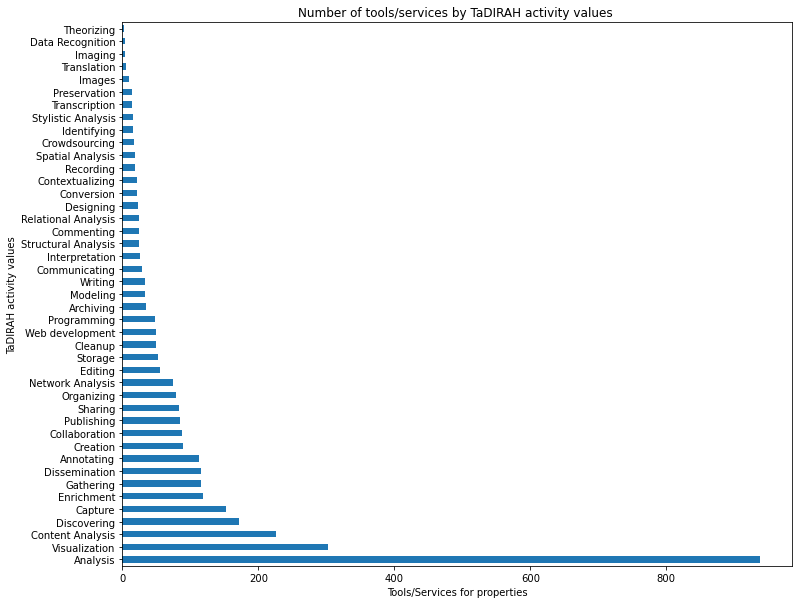

In [210]:
df_temp_type_conceptlabel = tad_prop['concept.label'].value_counts()
fig, ax = plt.subplots()
df_temp_type_conceptlabel.plot.barh(figsize=(12,10), ax=ax)
ax.set_title('Number of tools/services by TaDIRAH activity values ')
ax.set_xlabel('Tools/Services for properties')
ax.set_ylabel('TaDIRAH activity values');

In [249]:
#10 higher frequeency values
df_temp_type_conceptlabel.head(10)

Analysis            938
Visualization       303
Content Analysis    226
Discovering         171
Capture             152
Enrichment          119
Gathering           115
Dissemination       115
Annotating          112
Creation             89
Name: concept.label, dtype: int64

In [222]:
#printing in a dfile all TaDIRAH activities in the MP
act_prop_temp=tad_prop[['type.label', 'value', 'type.code', 'type.type', 'concept.label', 'concept.uri', 'concept.vocabulary.code', 'concept.vocabulary.label']]
act_prop=act_prop_temp.drop_duplicates()
act_prop.head()

,type.label,value,type.code,type.code,type.type,type.type,concept.label,concept.uri,concept.vocabulary.code,concept.vocabulary.label
5,Activity,None,activity,activity,concept,concept,Visualization,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/32,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
6,Activity,None,activity,activity,concept,concept,Analysis,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
9,Activity,None,activity,activity,concept,concept,Gathering,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/11,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
10,Activity,None,activity,activity,concept,concept,Capture,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/7,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
16,Activity,None,activity,activity,concept,concept,Programming,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/17,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities


See: https://docs.google.com/spreadsheets/d/1dVoXtS6WttzNh2EpiK39exxZR_7zXPpnPtaz-wQPekk/edit#gid=944819204 for the complete list

In [42]:
act_prop.sort_values('concept.label').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/actualtadirahvalues.csv')

In [219]:
#df_tad_prop=df_dypro_flat_values_joined[['code', 'label', 'notation', 'definition', 'uri', 'vocabulary.label']].sort_values('label')
#df_tad_prop.head(10)

In [218]:
#df_joinedprops=df_tad_prop.join(tad_prop.set_index('concept.uri'), on='uri', lsuffix='_left', rsuffix='_right')
#df_joinedprops.head(2)

#### The NeMO Concept Scheme vocabulary values

In [213]:
nemo_prop=properties_df[properties_df['concept.vocabulary.label'] == 'NeMO Concept Scheme']
nemo_prop.head()

,id,label,type.label,type.code,value,type.type,type.code,concept.label,type.type,type.ord,concept.uri,concept.vocabulary.code,concept.vocabulary.label
85,103295,Academia.edu,Activity,activity,None,concept,activity,Communicating,concept,2,http://dcu.gr/ontologies/scholarlyontology/instances/ActivityType-Communicating,nemo-activity-type,NeMO Concept Scheme
162,102908,Afloat,Activity,activity,None,concept,activity,Communicating,concept,2,http://dcu.gr/ontologies/scholarlyontology/instances/ActivityType-Communicating,nemo-activity-type,NeMO Concept Scheme
1148,97740,Camtasia,Activity,activity,None,concept,activity,Communicating,concept,2,http://dcu.gr/ontologies/scholarlyontology/instances/ActivityType-Communicating,nemo-activity-type,NeMO Concept Scheme
1468,102882,CiteULike,Activity,activity,None,concept,activity,Communicating,concept,2,http://dcu.gr/ontologies/scholarlyontology/instances/ActivityType-Communicating,nemo-activity-type,NeMO Concept Scheme
2621,102353,DH Press,Activity,activity,None,concept,activity,Communicating,concept,2,http://dcu.gr/ontologies/scholarlyontology/instances/ActivityType-Communicating,nemo-activity-type,NeMO Concept Scheme


In [216]:
df_tempnp_type_conceptlabel = nemo_prop['concept.label'].value_counts()
df_tempnp_type_conceptlabel

Communicating    19
Name: concept.label, dtype: int64

### Tadira Goals values

In [242]:
mp_tadirahgoals=properties_df[properties_df['type.label'] == 'Tadirah Goals']
df_temp_type_tadirahgoals = mp_tadirahgoals['value'].value_counts()
df_temp_type_tadirahgoals

Analysis          526
Capture           148
Enrichment        114
Dissemination     106
Creation           81
Storage            45
Interpretation     26
Name: value, dtype: int64

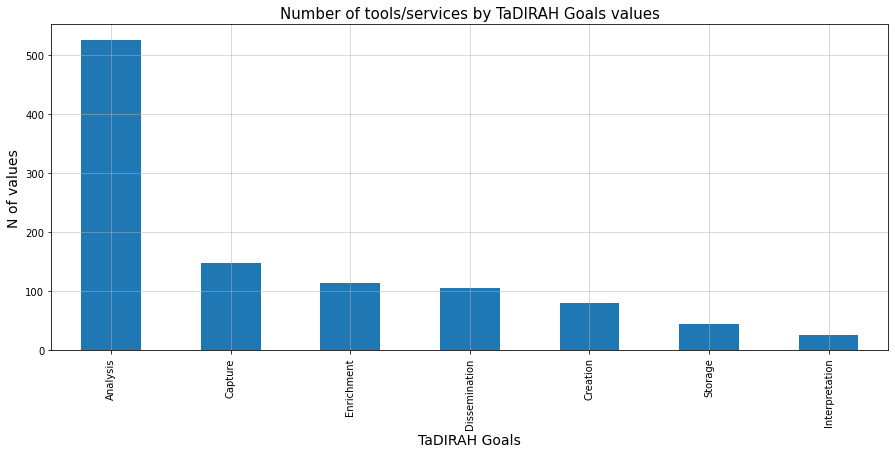

In [244]:
fig, ax = plt.subplots()
df_temp_type_tadirahgoals.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of tools/services by TaDIRAH Goals values", fontsize=15)
ax.set_xlabel('TaDIRAH Goals', fontsize=14)
ax.set_ylabel('N of values', fontsize=14);
plt.show()

### Tadirah Methods values

In [246]:
mp_tadirahmethods=properties_df[properties_df['type.label'] == 'Tadirah Methods']
mp_tadirahmethods.head()

,id,label,type.label,type.code,value,type.type,type.code,concept.label,type.type,type.ord,concept.uri,concept.vocabulary.code,concept.vocabulary.label
4,96468,140kit,Tadirah Methods,tadirah-methods,Visualization,string,tadirah-methods,NaN,string,13,NaN,NaN,NaN
12,96476,140kit,Tadirah Methods,tadirah-methods,Gathering,string,tadirah-methods,NaN,string,13,NaN,NaN,NaN
17,95945,4th Dimension,Tadirah Methods,tadirah-methods,Programming,string,tadirah-methods,NaN,string,13,NaN,NaN,NaN
22,95950,4th Dimension,Tadirah Methods,tadirah-methods,Web development,string,tadirah-methods,NaN,string,13,NaN,NaN,NaN
24,95952,4th Dimension,Tadirah Methods,tadirah-methods,Writing,string,tadirah-methods,NaN,string,13,NaN,NaN,NaN


In [254]:
df_temp_type_tadirahmethods = mp_tadirahmethods['value'].value_counts()
df_temp_type_tadirahmethods.head()

Visualization           303
Other (analysis)        254
Content Analysis        226
Discovering             171
Statistical Analysis    168
Name: value, dtype: int64

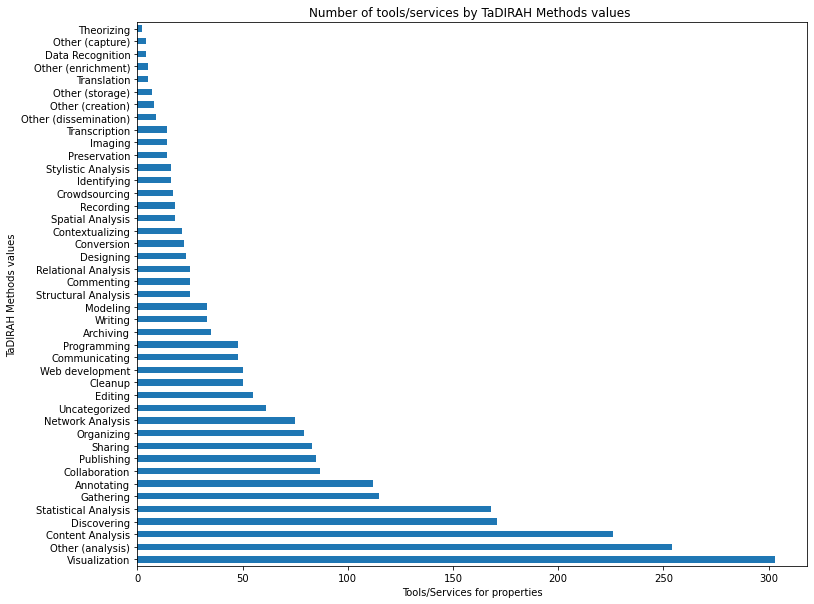

In [251]:
fig, ax = plt.subplots()
df_temp_type_tadirahmethods.plot.barh(figsize=(12,10), ax=ax)
ax.set_title('Number of tools/services by TaDIRAH Methods values ')
ax.set_xlabel('Tools/Services for properties')
ax.set_ylabel('TaDIRAH Methods values');

### Type property == Thumbnail (?)

In [255]:
mp_thumbnail=properties_df[properties_df['type.label'] == 'Thumbnail']
mp_thumbnail.head()

,id,label,type.label,type.code,value,type.type,type.code,concept.label,type.type,type.ord,concept.uri,concept.vocabulary.code,concept.vocabulary.label
1615,3994,Coffitivity,Thumbnail,thumbnail,http://tapor.ca/images/tools/missing.jpg,url,thumbnail,NaN,url,8,NaN,NaN,NaN


In [280]:
df_coffi=properties_df[properties_df['label'] == 'Coffitivity']
df_coffi.head()

,id,label,type.label,type.code,value,type.type,type.code,concept.label,type.type,type.ord,concept.uri,concept.vocabulary.code,concept.vocabulary.label
1612,3991,Coffitivity,Web Usable,web-usable,Other,string,web-usable,NaN,string,11,NaN,NaN,NaN
1613,3992,Coffitivity,Tadirah Methods,tadirah-methods,Uncategorized,string,tadirah-methods,NaN,string,13,NaN,NaN,NaN
1614,3993,Coffitivity,Keyword,keyword,Uncategorized,string,keyword,NaN,string,6,NaN,NaN,NaN
1615,3994,Coffitivity,Thumbnail,thumbnail,http://tapor.ca/images/tools/missing.jpg,url,thumbnail,NaN,url,8,NaN,NaN,NaN
